In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train[:5] # 2d array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,) # 2d to 1d
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

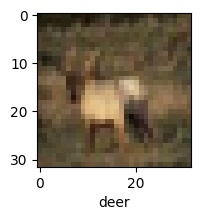

In [8]:
plot_sample(X_train, y_train, 3)

In [9]:
# normalize
X_train = X_train / 255
X_test = X_test / 255

# ANN

In [10]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.8106 - accuracy: 0.3578
Epoch 2/5
1563/1563 [==============================] - 70s 45ms/step - loss: 1.6240 - accuracy: 0.4282
Epoch 3/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.5421 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.4840 - accuracy: 0.4778
Epoch 5/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4332 - accuracy: 0.4972


In [11]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 9s 26ms/step - loss: 1.4885 - accuracy: 0.4726


[1.4885354042053223, 0.4726000130176544]

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 12s 36ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.36      0.48      1000
           1       0.71      0.42      0.53      1000
           2       0.47      0.13      0.20      1000
           3       0.29      0.50      0.36      1000
           4       0.44      0.44      0.44      1000
           5       0.39      0.36      0.37      1000
           6       0.46      0.62      0.52      1000
           7       0.56      0.56      0.56      1000
           8       0.50      0.73      0.60      1000
           9       0.53      0.60      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



# CNN

In [13]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
        
    # dense
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # normalize probability
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 1.4734 - accuracy: 0.4709
Epoch 2/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.1132 - accuracy: 0.6113
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9883 - accuracy: 0.6567
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9099 - accuracy: 0.6860
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8415 - accuracy: 0.7070
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7912 - accuracy: 0.7230
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7395 - accuracy: 0.7414
Epoch 8/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6964 - accuracy: 0.7552
Epoch 9/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6600 - accuracy: 0.7681
Epoch 10/10
1563/1563 [==============================] - 54s 34m

In [14]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9587 - accuracy: 0.6863


[0.9586526155471802, 0.6862999796867371]

In [15]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[1.2187404e-03, 1.7236787e-05, 8.6408574e-03, 8.3377463e-01,
        3.9072116e-04, 1.4772414e-01, 2.9390934e-03, 8.0333870e-05,
        5.2090320e-03, 5.2178439e-06],
       [4.2050201e-03, 8.0256903e-01, 2.1065865e-05, 1.8131866e-06,
        1.0242946e-07, 4.5921107e-09, 2.7701264e-08, 7.1387980e-08,
        1.8900454e-01, 4.1983486e-03],
       [3.7475031e-02, 8.1002280e-02, 2.9335951e-03, 2.0657759e-03,
        4.3104996e-04, 8.6528344e-05, 7.3796581e-04, 2.6218397e-05,
        8.7260413e-01, 2.6373791e-03],
       [7.2865701e-01, 1.2790185e-01, 8.1954803e-03, 1.1491886e-03,
        8.1814935e-05, 2.9095190e-05, 4.4852824e-04, 4.2841904e-05,
        1.2718102e-01, 6.3131759e-03],
       [5.5748301e-06, 4.0113232e-06, 1.5442667e-02, 2.2650876e-03,
        5.7589990e-01, 1.8193617e-03, 4.0453863e-01, 8.4664835e-06,
        1.5619171e-05, 7.0495338e-07]], dtype=float32)

In [16]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
# argmax: index of largest element
y_classes[:5]

[3, 1, 8, 0, 4]

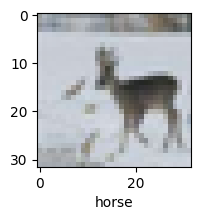

In [31]:
plot_sample(X_test, y_test,20)

In [32]:
classes[y_classes[20]]

'horse'

In [21]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.76      0.72      1000
           1       0.73      0.88      0.80      1000
           2       0.49      0.69      0.57      1000
           3       0.56      0.46      0.51      1000
           4       0.67      0.54      0.60      1000
           5       0.65      0.56      0.60      1000
           6       0.79      0.73      0.76      1000
           7       0.71      0.78      0.74      1000
           8       0.81      0.79      0.80      1000
           9       0.84      0.68      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

